# Introduction to SYGMA


How to use the notebook:

$\odot$ Execute cell: select cell and shift+enter


$\odot$ To start again and remove all output:  Cell > All output > Clear
 
$\odot$ The circle in the menu bar in the upper right corner indicates if the program is busy.

$\odot$ In the case the notebook is stuck restart the kernel or close and re-open the notebook.

# Abstract

The basic capabilities of SYGMA are explained and demonstrated.
You can run all the commmands below in the interactive python session on YOUR computer.

To import the module. Navigate for that in the NUPYCEE directory. In case you do execute the code from another
directory you need to set the SYGMADIR variable.

In [40]:
import sygma as s

## 1.) Runnig the simulation

In the following the evolution of a single stellar population (SSP, one starburst) with an initial metallicty of $Z=0.0001$ is calculated. The SSP has a total mass of $10^{11}M_{\odot}$.  When reaching $1.3*10^{10}$ years the code stops. Start the simulation by creating an instance of the class $sygma$:

In [42]:
s1=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.62s


Note that other input parameter are here  set by default such as the Salpeter IMF and the mass range betwen $1$ and $30M_{\odot}$.

## 2) Visualization

### Total mass evolution

SYGMA provides plotting functions which have the form plot_*. Check out the
<a href="http://nupycee.bitbucket.org/SPHINX/build/html/sygma.html">SPHINX documentation</a> for
more input parameter and their definition.
Now lets plot the evolution of the total gas mass.

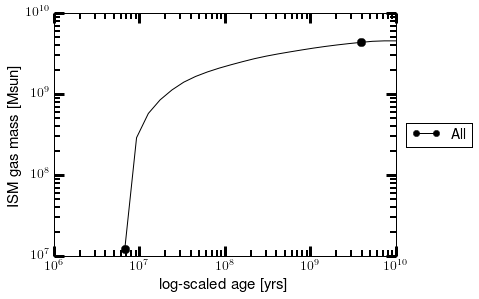

In [14]:
s1.plot_totmasses(fig=1,source='all')

You can also specify other parameter which are explained the in the online documentation. For example the code can distinguish between the three main stellar sources: AGB, masive and SN1a.

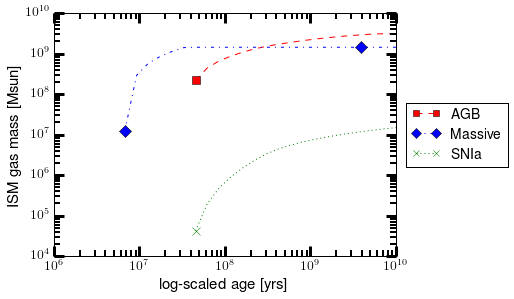

In [13]:
s1.plot_totmasses(fig=2,source='agb')
s1.plot_totmasses(fig=2,source='massive')
s1.plot_totmasses(fig=2,source='sn1a')

One can also analyze the contribution of specific isotopes and elements.

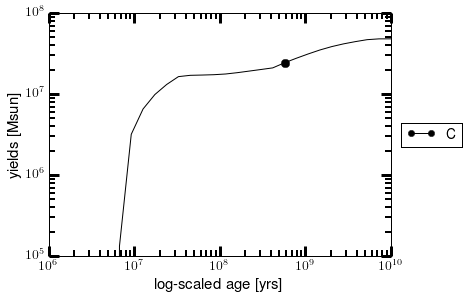

In [15]:
s1.plot_mass(fig=3,specie='C', source='all')

You can plot the evolution of isotopes and elements in spectroscopic notation, such as [Fe/H]:

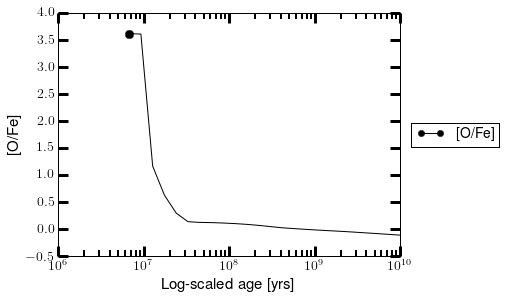

In [16]:
s1.plot_spectro(fig=4,xaxis='age',yaxis='[O/Fe]', source='all')

Here you see the total mass contribution for C from each initial mass interval.

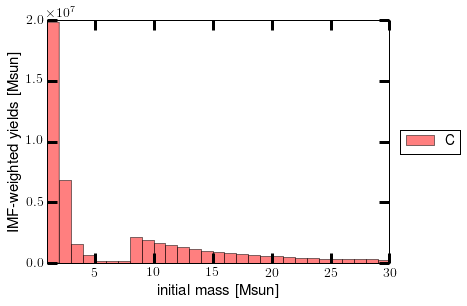

In [20]:
s1.plot_mass_range_contributions(fig=5,specie='C')

## 3) Data extraction

Yield tables showing the evolution of elements and isotopes can be downloaded. In the following example the elements H, He and C are extracted and are saved
in the evol_tables directory. If you use this notebook in the WENDI web interface you cannot access the table directly.

In [43]:
s1.write_evol_table(elements=['H','He','C'])

file gce_table.txt saved in subdirectory evol_tables.


## 4) Demonstration of basic capabilities

In the following we show basic capabilities of SYGMA which include changing the IMF, adaptiong the IMF range and changing the delay-time distribution of SNIa.

In [37]:
s11=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,imf_type='chabrier') #default type 'salpeter', change to chabrier IMF

SYGMA run in progress..
   SYGMA run completed - Run time: 0.62s


In [38]:
s22=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,imf_bdys=[2,15]) #default from 1 to 30Msun, changed to 2 to 15Msun

SYGMA run in progress..
   SYGMA run completed - Run time: 0.61s


In [39]:
s33=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,sn1a_on=False) #turning SNIa  off

SYGMA run in progress..
   SYGMA run completed - Run time: 0.28s


For  each run you could add here plots  introduced in 2).

## 5) How to use own yields

As default SYGMA uses NuGrid's yield tables for AGB and massive stars. Other defaults are the
choice of SNIa yields from <a href="http://adsabs.harvard.edu/abs/1986A%26A...158...17T">Thielemann 1986</a>
and POPIII stars from <a href="http://adsabs.harvard.edu/abs/2010ApJ...724..341H">Heger 2010</a>.
Using your own yield is possible through the download of SYGMA in the NUPCEE platform on the  <a href="http://nupycee.bitbucket.org">NUPCEE web page.</a>

####   The following demonstration can only be done on your local machine.

To use own yields it is necessary to specify the input variable $table = 'yourtablename'$. The table need
to have the NuGrid yield table format which is found in the default yield table file specified with $table='yield\_tables/isotope\_yield\_table.txt'$.
All yield table files are available in the $yield\_tables$ directory. It is necessary to specify
a initial abundance file via the input variable $iniabu\_table$ which must be placed in the $iniabu$ directory
within $yield\_tables$. Note that yield tables and initial abundance files must include the same isotopes. In the following we show a example
with artificial yields with only the species H-1.

In [31]:
smod=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,table='yield_tables/isotope_yield_table_h1.txt',iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s


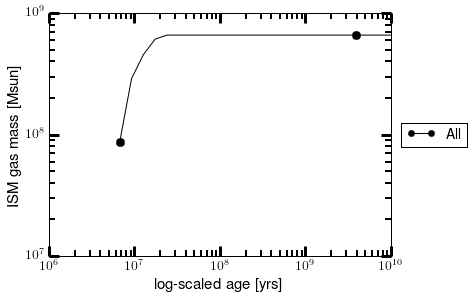

In [30]:
smod.plot_totmasses(fig=6,source='all')